In [2]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [21]:
import numpy as np 

def conv(val, default_val=0):
        try:
              return int(val.replace('\'', ''))
        except ValueError:
              return default_val

def convFloat(val, default_val=0):
        try:
              return float(val.replace('\'', ''))
        except ValueError:
              return default_val
def convString(val, default_val=0):
        try:
              return val.replace('\'', '')
        except ValueError:
              return default_val
            
users = pd.read_csv("usersClassification.csv", sep=',', converters={"day":conv, 
                                                                    "cd":conv, 
                                                                    "prod_id":conv, 
                                                                    "user_id": conv,
                                                                    "v1": convFloat,
                                                                    "v2": convFloat, 
                                                                    "v3": convFloat, 
                                                                    "v4": convFloat,
                                                                    "v5": convFloat, 
                                                                    'element_type': convString, 
                                                                    'life_class': convString, 
                                                                    'first_usage': conv})
# print(users['day'])
# users.dropna(axis="rows", how="any", inplace=True)
# users['mes_sum'] = users['mes_from'] + users['mes_to']
# print(users)
# u = users[['day']]
# print(users)
# print(users)
def select(x):
    if x == '3months':
        return 4
    if x == '2months':
        return 3
    if x == '1month':
        return 2
    if x == '14days':
        return 1
    if x == '7days':
        return 0
    
users['result'] = users['life_class'].map(lambda x: select(x))

users = users.drop_duplicates(subset=['date'], keep="last")

# u_test = users.loc[(users['day'] == 1) & (users['first_usage'] == 1)]
u_test = users

print(u_test[['result']])

       result
5           4
7           4
8           4
9           4
10          4
15          4
18          4
21          4
22          4
23          4
25          4
30          4
32          4
34          4
35          4
37          4
38          4
39          4
41          4
46          4
51          4
52          4
54          4
59          4
60          4
62          4
67          4
68          4
72          4
73          4
...       ...
50764       4
50765       4
50766       4
50767       4
50768       4
50769       4
50770       4
50771       4
50772       4
50773       4
50774       4
50775       4
50776       4
50777       4
50778       4
50779       4
50780       4
50781       4
50782       4
50783       4
50784       4
50785       4
50786       4
50787       4
50788       4
50789       4
50790       4
50791       4
50792       4
50793       4

[37765 rows x 1 columns]


In [22]:
test_all = pd.DataFrame()


dictionary = {}

groupByTuple = tuple(u_test.groupby(["cd", "element_type", "prod_id"]))
 
for index, t in enumerate(groupByTuple):
#     print(t[0])
    dictionary[str(t[0])] = t[1] 

average1 = []
average2 = []
average3 = []
average4 = []
average5 = []

# name1 = 'friends_pre'
# name2 = 'log_pre'
# name3 = 'sum_changes'
# name4 = 'mes_from'
# name5 = 'mes_to'


name1 = 'v1'
name2 = 'v2'
name3 = 'v3'
name4 = 'v4'
name5 = 'v5'
    
print('DICIONAY LEN')

print(len(dictionary))
    
for key in dictionary.keys():

    if(dictionary.get(key)['life_class'].unique() == '7days'):
        
        average1.append(dictionary.get(key)[name1].mean())
        average2.append(dictionary.get(key)[name2].mean())
        average3.append(dictionary.get(key)[name3].mean())
        average4.append(dictionary.get(key)[name4].mean())
        average5.append(dictionary.get(key)[name5].mean())
        
                
        df2 = pd.DataFrame({'name1': (sum(average1) / len(average1)),
                  'name2': (sum(average2) / len(average2)),
                  'name3': (sum(average3) / len(average3)),
                  'name4': (sum(average4) / len(average4)),
                  'name5': (sum(average5) / len(average5)),
                  'result': [0]})
        
        test_all = test_all.append(df2, ignore_index=True)

    
average1 = []
average2 = []
average3 = []
average4 = []
average5 = []


for key in dictionary.keys():
    if(dictionary.get(key)['life_class'].unique() == '14days'):
        
        average1.append(dictionary.get(key)[name1].mean())
        average2.append(dictionary.get(key)[name2].mean())
        average3.append(dictionary.get(key)[name3].mean())
        average4.append(dictionary.get(key)[name4].mean())
        average5.append(dictionary.get(key)[name5].mean())
        
        df2 = pd.DataFrame({'name1': sum(average1) / len(average1),
                  'name2': sum(average2) / len(average2),
                  'name3': sum(average3) / len(average3),
                  'name4': sum(average4) / len(average4),
                  'name5': sum(average5) / len(average5),
                  'result': [1]
                 })

        test_all = test_all.append(df2, ignore_index=True)

average1 = []
average2 = []
average3 = []
average4 = []
average5 = []

for key in dictionary.keys():

    if(dictionary.get(key)['life_class'].unique() == '1month'):
        
        average1.append(dictionary.get(key)[name1].mean())
        average2.append(dictionary.get(key)[name2].mean())
        average3.append(dictionary.get(key)[name3].mean())
        average4.append(dictionary.get(key)[name4].mean())
        average5.append(dictionary.get(key)[name5].mean())
        
        df2 = pd.DataFrame({'name1': sum(average1) / len(average1),
                  'name2': sum(average2) / len(average2),
                  'name3': sum(average3) / len(average3),
                  'name4': sum(average4) / len(average4),
                  'name5': sum(average5) / len(average5),
                  'result': [2]
                 })
        
        test_all = test_all.append(df2, ignore_index=True)

average1 = []
average2 = []
average3 = []
average4 = []
average5 = []



for key in dictionary.keys():
    if(dictionary.get(key)['life_class'].unique() == '2months'):
        
        average1.append(dictionary.get(key)[name1].mean())
        average2.append(dictionary.get(key)[name2].mean())
        average3.append(dictionary.get(key)[name3].mean())
        average4.append(dictionary.get(key)[name4].mean())
        average5.append(dictionary.get(key)[name5].mean())
        
        df2 = pd.DataFrame({'name1': sum(average1) / len(average1),
                  'name2': sum(average2) / len(average2),
                  'name3': sum(average3) / len(average3),
                  'name4': sum(average4) / len(average4),
                  'name5': sum(average5) / len(average5),
                  'result': [3]
                 })
        
        test_all = test_all.append(df2, ignore_index=True)

average1 = []
average2 = []
average3 = []
average4 = []
average5 = []


for key in dictionary.keys():
    if(dictionary.get(key)['life_class'].unique() == '3months'):
        
        average1.append(dictionary.get(key)[name1].mean())
        average2.append(dictionary.get(key)[name2].mean())
        average3.append(dictionary.get(key)[name3].mean())
        average4.append(dictionary.get(key)[name4].mean())
        average5.append(dictionary.get(key)[name5].mean())

        df2 = pd.DataFrame({'name1': sum(average1) / len(average1),
                  'name2': sum(average2) / len(average2),
                  'name3': sum(average3) / len(average3),
                  'name4': sum(average4) / len(average4),
                  'name5': sum(average5) / len(average5),
                  'result': [4]
                 })

        test_all = test_all.append(df2, ignore_index=True)
print(test_all)

DICIONAY LEN
189
        name1     name2     name3     name4     name5  result
0    1.025000  0.342083  0.977917  0.807083  0.001250       0
1    0.697500  0.266042  0.988958  0.723542  0.001875       0
2    0.608889  0.250139  0.992639  0.689028  0.001806       0
3    0.654722  0.243437  0.941146  0.707049  0.004965       0
4    0.749778  0.264750  0.952917  0.705639  0.005972       0
5    0.718981  0.868125  1.267431  0.779699  0.016644       0
6    0.665698  1.574107  1.410940  0.802599  0.201980       0
7    0.586236  2.564844  1.234573  0.702274  0.230483       0
8    0.569584  2.869659  1.281843  0.726971  0.306692       0
9    0.567792  2.921527  1.279658  0.736941  0.329022       0
10   0.523447  3.401085  1.175447  0.690249  0.388202       0
11   0.528577  3.492244  1.119160  0.661895  0.392935       0
12   0.490225  3.888226  1.033071  0.610980  0.425787       0
13   0.471875  4.095019  1.102137  0.626862  0.458945       0
14   0.489750  4.084684  1.132661  0.665072  0.577015

result
0    51
1    21
2    35
3    24
4    58
dtype: int64


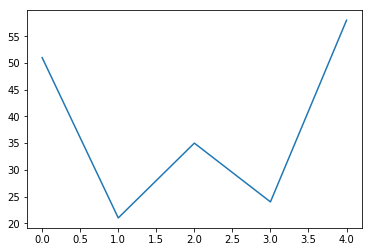

In [23]:
print(test_all.groupby('result').size())
plt.plot(test_all.groupby('result').size())
plt.show()


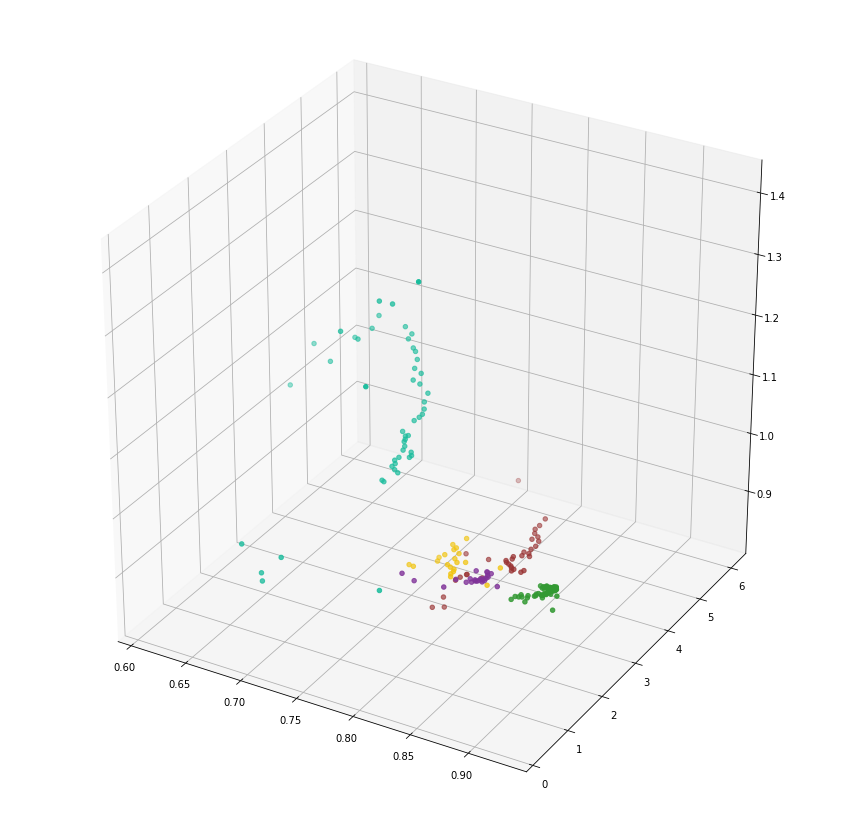

In [25]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

colors = []


for index, row in test_all.iterrows(): 
    if row['result'] == 0:
        colors.append('#19bc9c') # zielony morski 7 day
    if row['result'] == 1:
        colors.append('#f1c40e') # zolty 14 day
    if row['result'] == 2:
        colors.append('#993333') # bordowy 1 month
    if row['result'] == 3:
        colors.append('#803399') # fiolet 2 months
    if row['result'] == 4:
        colors.append('#339933') # zielony standard 3 months


ax = plt.axes(projection='3d')


# ax.set_xlabel('Friends', labelpad=14)
# ax.set_ylabel('Logs', labelpad=14)
# ax.set_zlabel('Messages sum', labelpad=16)

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.zaxis.label.set_size(18)


xdata = test_all['name4']
ydata = test_all['name2']
zdata = test_all['name3']

ax.scatter3D(xdata, ydata, zdata, color=colors);

life_class
14days      183
1month     1058
2months     595
3months    2914
7days       224
dtype: int64


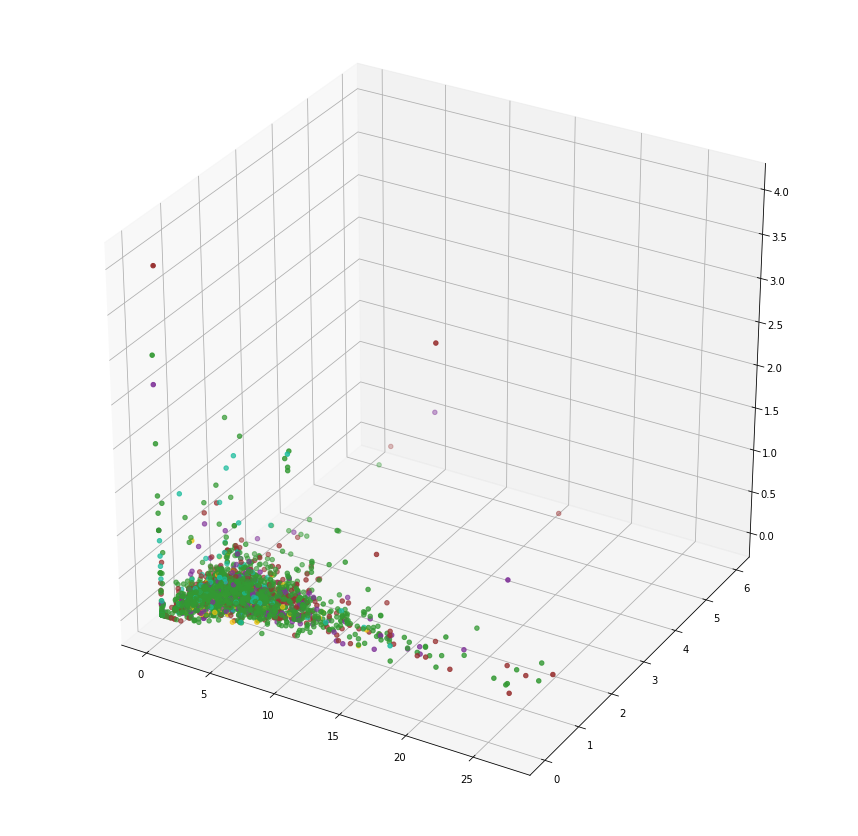

In [154]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

colors = []


for index, row in u_test.iterrows(): 
    if row['life_class'] == '7days':
        colors.append('#19bc9c') # zielony morski 7 day
    if row['life_class'] == '14days':
        colors.append('#f1c40e') # zolty 14 day
    if row['life_class'] == '1month':
        colors.append('#993333') # bordowy 1 month
    if row['life_class'] == '2months':
        colors.append('#803399') # fiolet 2 months
    if row['life_class'] == '3months':
        colors.append('#339933') # zielony standard 3 months

print(u_test.groupby('life_class').size())
ax = plt.axes(projection='3d')


# ax.set_xlabel('Friends', labelpad=14)
# ax.set_ylabel('Logs', labelpad=14)
# ax.set_zlabel('Messages sum', labelpad=16)

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.zaxis.label.set_size(18)


xdata = u_test['v1']
ydata = u_test['v4']
zdata = u_test['v5']

ax.scatter3D(xdata, ydata, zdata, color=colors);

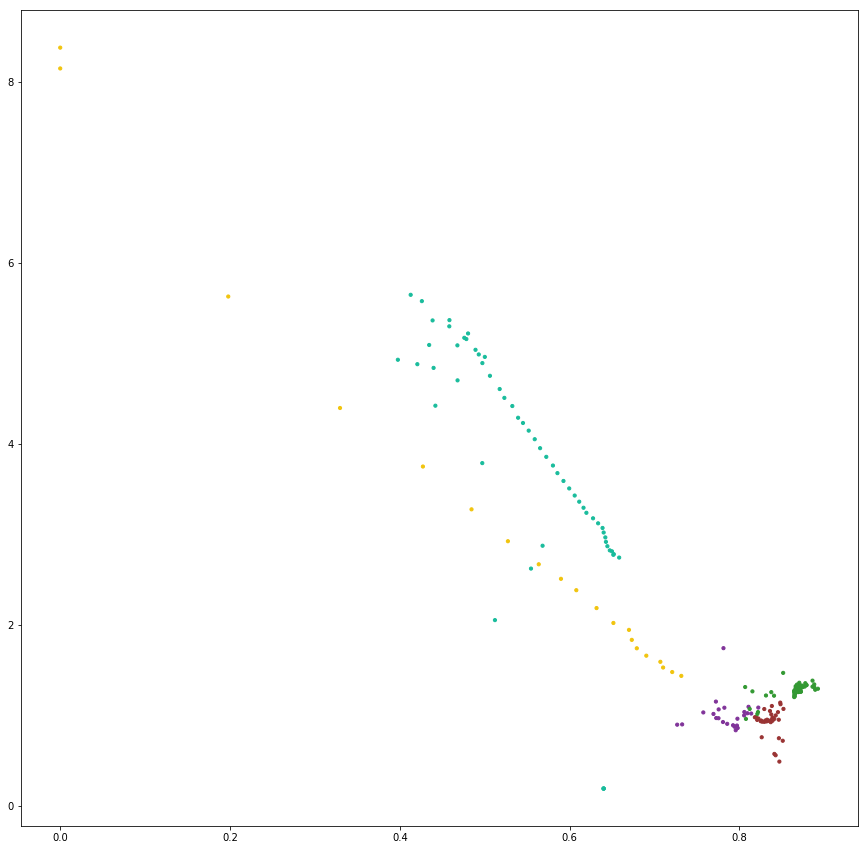

In [105]:
fig, ax0 = plt.subplots(figsize=(15,15))


ax0.scatter(test_all['name4'], test_all['name2'], s=10, color=colors)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test_all[['name1', 'name2', 'name3', 'name4',  'name5']], test_all[['result']], test_size=0.32, random_state=2)

clf = RandomForestClassifier(n_estimators=3)
clf = clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.984126984127


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test_all[['name1', 'name2', 'name3', 'name4',  'name5']], test_all[['result']], test_size=0.42, random_state=2)

clf = DecisionTreeClassifier(random_state=2)
clf = clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))


0.939024390244
